# From Linear Regression to Logistic Regression

From this project, you will learn:
*  How to do linear regression
*  What is the limitation of linear regression
*  Why do we need logistic regression
*  How to do logistic regression in real data

# Let's begin!

Import necessary package first

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Explore the data</h2>

Data Description
*  Rocks vs Mines (https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))
*  Independent variables: sonar soundings at different frequencies
*  Dependent variable (target): Rock or Mine

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url) #Your code here
print("Shape of the dataset: ",df.shape )
print("Number of unique values in each column: ",df.nunique())
print("Shape of the dataset: ",df.shape )




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0.0200    207 non-null float64
0.0371    207 non-null float64
0.0428    207 non-null float64
0.0207    207 non-null float64
0.0954    207 non-null float64
0.0986    207 non-null float64
0.1539    207 non-null float64
0.1601    207 non-null float64
0.3109    207 non-null float64
0.2111    207 non-null float64
0.1609    207 non-null float64
0.1582    207 non-null float64
0.2238    207 non-null float64
0.0645    207 non-null float64
0.0660    207 non-null float64
0.2273    207 non-null float64
0.3100    207 non-null float64
0.2999    207 non-null float64
0.5078    207 non-null float64
0.4797    207 non-null float64
0.5783    207 non-null float64
0.5071    207 non-null float64
0.4328    207 non-null float64
0.5550    207 non-null float64
0.6711    207 non-null float64
0.6415    207 non-null float64
0.7104    207 non-null float64
0.8080    207 non-null float64
0.6791    207 non-null floa

We can see that:
<li>60 float64 columns. These are the sonar readings and will form our feature set
<li>One object column. This will be our target/output/dependent variable

<h2>Generate a few summary statistics</h2>

<h4>See all columns first</h4>

In [3]:
# In order to view all columns in the notebbok. Use the following command 
pd.options.display.max_columns=100
# Look at the columnwise summary of the dataset 
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

<h4>We want to know the unique values of the label/target/dependent variable </h4>

In [4]:
df[60].unique()

array(['R', 'M'], dtype=object)

<h4>Examine correlations</h4>

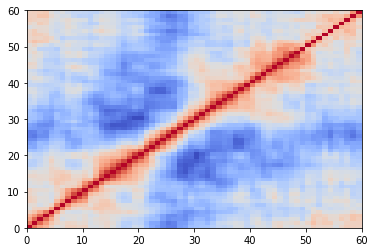

In [5]:
# Looking at pair wise correlations between all the columns. The red dialgonal line indicates high correlation,
# thats because the diagonal line represents a columns correlation with itself i.e 1.   
plt.pcolor(df.corr(),cmap='coolwarm')

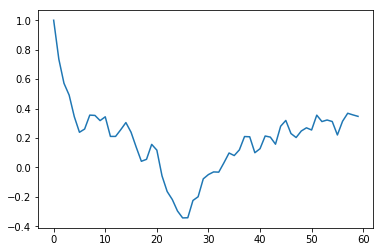

In [6]:
# This plot shows correlation of the features with the target variable. 
df.corr()[0].plot()

Here are some tips on correlation:
*  Highly correlated items are not good
*  Low correlated items are good 
*  Correlations with target: the larger have greater predictive power

<h2>Training a classifier on Rocks vs Mines</h2>
We will use sklearn package here

<h4>Convert labels R and M to 0 and 1</h4>

In [7]:
df[60]= #Change the code here to convert labels R and M to 0 and 1

<h2>Training and testing</h2>
<li><span style="color:blue">Training dataset</span>: The model is "fit" using a training sample
<li><span style="color:blue">Testing dataset</span>: The "fitted" model is evaluated on a testing sample
<li><span style="color:blue">validation dataset</span>: Sometimes, a dataset is used to "fine tune" model parameters after training but before testing

Since we do not need to tune our parameters here, we'll use a training and testing dataset

In [8]:
from sklearn.model_selection import train_test_split
#Change the code here to split the dataset into training and test. You can use a 70-30 split for the dataset. 

<h2>Build the model and fit the training data</h2>
<li>The linear regression package is in sklearn's linear_model library
<li>We create a linear regression model object
<li>And give it our training data to "fit" the model
<li>Train the linear regression model below

In [9]:
from sklearn import linear_model
model = linear_model.LinearRegression()
#Add the code here to train the linear regression model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h2>Evaluating the model</h2>

<h4>Generate mean square errors and R-Square values</h4>

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_training = #Add the code here to make predictions on the training data  
y_pred_testing =  #Add the code here to make predictions on the test data

#Calculating the mean square error on the training dataset 
training_msq = mean_squared_error(y_pred_training,y_train)
#Calculating the mean square error on the test dataset 
testing_msq = mean_squared_error(y_pred_testing,y_test)
print(training_msq,testing_msq)

#Calculating the r2 score on the test dataset 
print('Test R-Square:',r2_score(y_test,y_pred_testing))

Test R-Square: -0.1007334057110516
0.07922734726783394 0.26346604571063215


# The results are terrible
But why?
<li>Regression is predicting continuous values between 0 and 1
<li>But all we need is a 0 (rock) or a 1 (mine)
<li>We may not care about mis-identifying rocks as mines as long as we identify mines correctly


In [11]:
# import required packages 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Build up the Logistic regression model

In [12]:
classifier = LogisticRegression(solver = 'lbfgs')

Train the model with training data

In [13]:
# Insert code here to train the logistic regression model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Predict the labels on training and testing data

In [14]:
y_train_pre = classifier.predict(x_train)
y_test_pre = classifier.predict(x_test)

In [15]:
train_accuracy = #Insert code here to measure the accuracy on training data 
print("Accuracy for training data (self accuracy):", train_accuracy)

test_accuracy = #Insert code here to measure the accuracy on test data 
print("Accuracy for testing data (self accuracy):", test_accuracy)

Accuracy for training data (self accuracy): 0.8689655172413793
Accuracy for testing data (self accuracy): 0.7777777777777778


As you can see, we see a much better accuracy using the logistic regression model. 


# Conclusions:
*  Using losgistic regression when the labels are discrete
*  linear regression should not be used for a classification task
*  logistic regression is one of the most simplest models in classification problems

# Congratulations!